### Course                    : Selected Topics in Computational Intelligence I
### Course Code          : COMP8038
### Lecturer Name       : Amalia Zahra, S.Kom., Ph. D.
### Lecturer Code        : D5990
### Class                       : LTY-1 

## Tugas Kelompok Genetic Algorithm Berlin52 Dataset

#### Kelompok 6:
#### Aldo Jonathan Handaka (2201736971)
#### Alim Raharjo (2201748164)
#### Edward (2201741971)	
#### Raffael Lucas Tatulus (2201742356)
#### Richard Geovani (2201734096)

# 1) Initial Population

## Generates Genes

In [1]:
from math import sqrt , pow

class city:

    def __init__(self,id,x,y):
        self.id = id
        self.x = x
        self.y = y
    
    def __str__(self):
        return "city {" + str(self.id) + " , " + str(self.x) +" , " + str(self.y) + "}"
    
    def getDistance(self,c):
        if self != None and c != None :
            distance = sqrt( pow(self.x - c.x , 2) + pow(self.y - c.y , 2))
            return distance    

## Read Dataset

In [2]:
import random
import os

cities = []
def readDataSet(filename):
    file_path = filename
    with open(file_path , "r") as f:
        for line in f:
            id  = int(line.split()[0].strip())  
            x   = float(line.split()[1].strip())  
            y   = float(line.split()[2].strip('\n'))

            cities.append(city(id,x,y))

def getNbrCities():
    return len(cities)


def getRandomCity():
    index  = random.randint(0,getNbrCities()-1)   
    return cities[index]

# 2) Calculate Fitness Value From Fitness Function

## Generate Chromosome

In [3]:
class tour :

    def __init__(self , init):
        self.nbrCities = getNbrCities()
        self.cities = [None] * self.nbrCities
        if init :
            self.initTour()
            self.fitness = self.calculateFitness()
        
    def __str__(self):
        path = ""
        for i in range(self.nbrCities):
            if i != self.nbrCities -1 :
                path += str(self.cities[i].id) + " -> "
            else :
                path += str(self.cities[i].id) + " . "             
        return path                   

    def initTourWithNone(self):
        for i in range(self.nbrCities):
            self.cities.append(None)
    
    def initTour(self):
        for i in range(self.nbrCities):
                city = getRandomCity()
                while self.contain(city) :
                    city =getRandomCity()
                self.cities[i] = city   

    def contain(self,city):
        for i in range(self.nbrCities):
            if self.cities[i] != None :
                if self.cities[i].id == city.id :
                    return True
        return False

    def getIndexOf(self,city):
        for i in range(self.nbrCities):
            if self.cities[i] == city.id :
                return i
        return -1        

    def calculateFitness(self):
        self.fitness = 0
        for i in range(self.nbrCities -1):
            self.fitness += self.cities[i].getDistance(self.cities[i+1])
        self.fitness += self.cities[len(self.cities) -1].getDistance(self.cities[0])
   
    def compare(self, other):
        return 1 if self.fitness < other.fitness else -1       


## Generate Population

In [4]:
class population :

    def __init__(self,populationSize,init):
        self.popSize = populationSize
        self.tours = [None] * self.popSize
        if init :
            self.initPopulation()
            self.calculateFitnessForAll()
            self.sortPopulation()           
            self.fittest = self.tours[0]
                
        

    def initPopulation(self):
        for i in range(self.popSize):
            self.tours[i] = tour(True)                

    def initPopulationWithNone(self):
        for i in range(self.popSize):
            self.tours.append(None)

    def sortPopulation(self):
        for i in range(self.popSize-1):
            index = i
            for j in range(i+1 , self.popSize):
                if self.tours[j].compare(self.tours[i]) > 0 :
                    index = j 
            tmp = self.tours[i]
            self.tours[i] = self.tours[index]
            self.tours[index] = tmp
    
    def getFittestTour(self):
        return self.fittest

    def getNFittestTour(self,n):
        return self.tours[:n]

    def calculateFitnessForAll(self):
        for i in range(self.popSize):
            self.tours[i].calculateFitness()  

## 3) Use Selection Methods (Elitism Selection and Tournament Selection Methods)

## 4) Use CrossOver Methods (OX1 CrossOver Methods)

## 5) Use Mutation Methods (Swap Mutation Methods)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

class geneticAlgorithm :

    def __init__(self,nbrGenerations,popSize,elitismSize,poolSize,mutationRate):
        self.nbrGenerations = nbrGenerations
        self.popSize = popSize
        self.elitismSize = elitismSize
        self.poolSize = poolSize
        self.mutationRate = mutationRate
        self.initialPopulation = population(self.popSize , True)
        self.fitnesses = np.zeros(self.nbrGenerations)
        print("Initial Fitness : " , self.initialPopulation.fittest.fitness)
        print("Best Tour : ",self.initialPopulation.fittest)
        newPopulation = self.initialPopulation
        generationCounter = 0
        for i in range(self.nbrGenerations):
            newPopulation = self.reproduction(newPopulation)
            self.fitnesses[generationCounter] = newPopulation.fittest.fitness
            generationCounter += 1

            print("Generation : ", generationCounter  )
            print("Fitness : ", newPopulation.fittest.fitness)
            print("Best Tour : ",newPopulation.fittest)
            print("\n\n")


        self.displayTheResult()    

    def reproduction(self,pop):
        newpop = population(pop.popSize,False)
        elitismSubPopulation = self.elitismSelection(pop)
        
        
        for index in range(self.elitismSize):
            newpop.tours[index] = elitismSubPopulation[index]
        
        for i in range(index , pop.popSize): 
            parent1 = self.touranmentSelection(pop)
            parent2 = self.touranmentSelection(pop) 
              
            child = self.Ox1CrossOver(parent1, parent2)

            self.SwapMutation(child)
            child.calculateFitness()
            newpop.tours[i] = child
        
        newpop.calculateFitnessForAll()
        newpop.sortPopulation()
        newpop.fittest = newpop.tours[0]
        return newpop

    def elitismSelection(self,pop):
        pop.sortPopulation()
        elitismSubPopulation = pop.tours[:self.elitismSize + 1]
        return elitismSubPopulation

    def touranmentSelection(self,pop):
        pool = [None] * self.poolSize
        for i in range(self.poolSize):
            index = random.randint(0,self.popSize -1)
            pool[i] = pop.tours[index]
        self.sortSubPopulation(pool)
        return pool[0]

    def sortSubPopulation(self,sub):
        for i in range(self.poolSize):
            index = i
            for j in range(i+1 , self.poolSize):
                if sub[j].compare(sub[i]) > 0 :
                    index = j 
            tmp = sub[i]
            sub[i] = sub[index]
            sub[index] = tmp
    
    def Ox1CrossOver(self,parent1,parent2):
        child = tour(False)

        start = random.randint(0,parent1.nbrCities)
        end   = random.randint(0,parent1.nbrCities)

        
        while start >= end :
              start = random.randint(0,parent1.nbrCities)
              end = random.randint(0,parent1.nbrCities)      
        
        for i in range(start,end):
            child.cities[i] = parent1.cities[i]            
        
        for i in range(parent2.nbrCities):
            if not child.contain(parent2.cities[i]) :
                for j in range(parent2.nbrCities):
                    if child.cities[j] is None :
                        child.cities[j] = parent2.cities[i]
                        break
        return child

    def SwapMutation(self,child):
        for i in range(child.nbrCities):
            mutationProbability = random.random()
            if mutationProbability < self.mutationRate :
                    mutationPoint = random.randint(0 , child.nbrCities -1)
                    tmp = child.cities[mutationPoint]
                    child.cities[mutationPoint] = child.cities[i]
                    child.cities[i] = tmp

    def displayTheResult(self):
        x = np.arange(0,self.nbrGenerations)
        plt.plot(x,self.fitnesses)
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.title("Fitness Value Over Generations ")
        plt.show()

# Result (Fitness Value and Best Path)

Initial Fitness :  28529.59748299338
Best Tour :  5 -> 27 -> 48 -> 7 -> 23 -> 40 -> 20 -> 26 -> 2 -> 43 -> 8 -> 36 -> 49 -> 9 -> 39 -> 10 -> 21 -> 28 -> 14 -> 41 -> 4 -> 38 -> 17 -> 13 -> 3 -> 19 -> 25 -> 31 -> 50 -> 29 -> 51 -> 11 -> 6 -> 22 -> 24 -> 44 -> 12 -> 52 -> 47 -> 35 -> 30 -> 1 -> 18 -> 45 -> 34 -> 33 -> 32 -> 42 -> 46 -> 37 -> 15 -> 16 . 
Generation :  1
Fitness :  26114.777446845233
Best Tour :  9 -> 15 -> 36 -> 34 -> 43 -> 14 -> 2 -> 47 -> 49 -> 7 -> 20 -> 13 -> 39 -> 50 -> 23 -> 22 -> 8 -> 6 -> 5 -> 35 -> 16 -> 21 -> 27 -> 31 -> 45 -> 42 -> 41 -> 19 -> 4 -> 40 -> 32 -> 46 -> 1 -> 3 -> 48 -> 38 -> 28 -> 52 -> 12 -> 26 -> 33 -> 25 -> 11 -> 51 -> 10 -> 29 -> 44 -> 30 -> 37 -> 24 -> 18 -> 17 . 



Generation :  2
Fitness :  25583.365733243907
Best Tour :  3 -> 30 -> 29 -> 12 -> 28 -> 46 -> 20 -> 39 -> 44 -> 8 -> 42 -> 49 -> 23 -> 41 -> 17 -> 31 -> 35 -> 19 -> 18 -> 15 -> 40 -> 48 -> 37 -> 34 -> 51 -> 33 -> 21 -> 7 -> 25 -> 52 -> 14 -> 47 -> 27 -> 2 -> 11 -> 5 -> 24 -> 9 -> 6

Generation :  26
Fitness :  17705.26116540635
Best Tour :  44 -> 37 -> 49 -> 41 -> 35 -> 4 -> 34 -> 22 -> 38 -> 19 -> 33 -> 39 -> 20 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 23 -> 31 -> 18 -> 32 -> 15 -> 40 -> 8 -> 45 -> 3 -> 29 -> 36 -> 50 -> 48 -> 24 -> 25 -> 13 -> 14 -> 26 -> 51 -> 10 -> 6 -> 46 -> 5 -> 27 -> 47 -> 28 -> 52 -> 11 -> 12 -> 16 -> 9 -> 43 . 



Generation :  27
Fitness :  17705.26116540635
Best Tour :  44 -> 37 -> 49 -> 41 -> 35 -> 4 -> 34 -> 22 -> 38 -> 19 -> 33 -> 39 -> 20 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 23 -> 31 -> 18 -> 32 -> 15 -> 40 -> 8 -> 45 -> 3 -> 29 -> 36 -> 50 -> 48 -> 24 -> 25 -> 13 -> 14 -> 26 -> 51 -> 10 -> 6 -> 46 -> 5 -> 27 -> 47 -> 28 -> 52 -> 11 -> 12 -> 16 -> 9 -> 43 . 



Generation :  28
Fitness :  16370.52376855887
Best Tour :  44 -> 37 -> 49 -> 41 -> 19 -> 22 -> 35 -> 34 -> 38 -> 33 -> 39 -> 16 -> 20 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 23 -> 31 -> 18 -> 32 -> 15 -> 40 -> 8 -> 45 -> 3 -> 29 -> 36 -> 50 -> 48 -> 24 -> 25 -> 13 -> 

Generation :  52
Fitness :  13279.158473251287
Best Tour :  49 -> 8 -> 41 -> 19 -> 44 -> 35 -> 34 -> 38 -> 6 -> 39 -> 16 -> 20 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 22 -> 23 -> 31 -> 18 -> 32 -> 15 -> 40 -> 37 -> 36 -> 45 -> 3 -> 29 -> 50 -> 48 -> 24 -> 25 -> 4 -> 5 -> 46 -> 27 -> 47 -> 28 -> 52 -> 13 -> 14 -> 26 -> 51 -> 33 -> 11 -> 12 -> 9 -> 10 -> 43 . 



Generation :  53
Fitness :  13279.158473251287
Best Tour :  49 -> 8 -> 41 -> 19 -> 44 -> 35 -> 34 -> 38 -> 6 -> 39 -> 16 -> 20 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 22 -> 23 -> 31 -> 18 -> 32 -> 15 -> 40 -> 37 -> 36 -> 45 -> 3 -> 29 -> 50 -> 48 -> 24 -> 25 -> 4 -> 5 -> 46 -> 27 -> 47 -> 28 -> 52 -> 13 -> 14 -> 26 -> 51 -> 33 -> 11 -> 12 -> 9 -> 10 -> 43 . 



Generation :  54
Fitness :  13279.158473251287
Best Tour :  49 -> 8 -> 41 -> 19 -> 44 -> 35 -> 34 -> 38 -> 6 -> 39 -> 16 -> 20 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 22 -> 23 -> 31 -> 18 -> 32 -> 15 -> 40 -> 37 -> 36 -> 45 -> 3 -> 29 -> 50 -> 48 -> 24 -> 25 -> 4 ->

Generation :  76
Fitness :  11736.973957949873
Best Tour :  35 -> 39 -> 34 -> 38 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 22 -> 31 -> 18 -> 32 -> 49 -> 37 -> 15 -> 48 -> 24 -> 40 -> 41 -> 8 -> 19 -> 3 -> 45 -> 29 -> 50 -> 36 -> 6 -> 25 -> 4 -> 5 -> 46 -> 27 -> 47 -> 28 -> 52 -> 13 -> 14 -> 26 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  77
Fitness :  11727.633485589859
Best Tour :  35 -> 34 -> 39 -> 38 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 22 -> 31 -> 18 -> 32 -> 49 -> 37 -> 15 -> 48 -> 24 -> 40 -> 41 -> 8 -> 19 -> 45 -> 3 -> 29 -> 50 -> 36 -> 6 -> 25 -> 4 -> 5 -> 46 -> 27 -> 47 -> 28 -> 52 -> 13 -> 14 -> 26 -> 51 -> 12 -> 11 -> 33 -> 9 -> 10 -> 43 . 



Generation :  78
Fitness :  11563.844748706162
Best Tour :  35 -> 34 -> 39 -> 38 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 22 -> 31 -> 18 -> 32 -> 49 -> 37 -> 15 -> 48 -> 24 -> 40 -> 41 -> 8 -> 19 -> 3 -> 45 -> 29 -> 50 -> 36 -> 6 -> 25 -> 4 ->

Generation :  101
Fitness :  10527.535025850199
Best Tour :  35 -> 34 -> 39 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 22 -> 31 -> 18 -> 32 -> 49 -> 37 -> 38 -> 5 -> 48 -> 24 -> 40 -> 41 -> 8 -> 19 -> 45 -> 3 -> 29 -> 50 -> 36 -> 15 -> 6 -> 25 -> 4 -> 46 -> 47 -> 26 -> 28 -> 27 -> 14 -> 13 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  102
Fitness :  10504.555144317354
Best Tour :  35 -> 34 -> 39 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 22 -> 31 -> 18 -> 32 -> 49 -> 37 -> 38 -> 5 -> 48 -> 24 -> 40 -> 41 -> 8 -> 19 -> 45 -> 3 -> 50 -> 29 -> 36 -> 15 -> 6 -> 25 -> 4 -> 46 -> 47 -> 26 -> 28 -> 27 -> 14 -> 13 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  103
Fitness :  10435.197259787541
Best Tour :  39 -> 34 -> 35 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 42 -> 2 -> 7 -> 30 -> 1 -> 22 -> 31 -> 18 -> 32 -> 49 -> 37 -> 38 -> 5 -> 48 -> 24 -> 40 -> 41 -> 8 -> 19 -> 45 -> 3 -> 29 -> 50 -> 36 -> 15 -> 6 -> 25

Generation :  126
Fitness :  10207.258996602151
Best Tour :  39 -> 34 -> 35 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 1 -> 22 -> 31 -> 18 -> 32 -> 49 -> 37 -> 38 -> 48 -> 24 -> 40 -> 8 -> 41 -> 19 -> 45 -> 3 -> 50 -> 29 -> 36 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 14 -> 13 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  127
Fitness :  10207.258996602151
Best Tour :  39 -> 34 -> 35 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 1 -> 22 -> 31 -> 18 -> 32 -> 49 -> 37 -> 38 -> 48 -> 24 -> 40 -> 8 -> 41 -> 19 -> 45 -> 3 -> 50 -> 29 -> 36 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 14 -> 13 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  128
Fitness :  10207.258996602151
Best Tour :  39 -> 34 -> 35 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 1 -> 22 -> 31 -> 18 -> 32 -> 49 -> 37 -> 38 -> 48 -> 24 -> 40 -> 8 -> 41 -> 19 -> 45 -> 3 -> 50 -> 29 -> 36 -> 5 -> 15 -> 6 -> 4 

Generation :  152
Fitness :  9603.497296203479
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 29 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 50 -> 22 -> 31 -> 18 -> 3 -> 49 -> 37 -> 38 -> 48 -> 24 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 1 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  153
Fitness :  9603.497296203479
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 29 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 50 -> 22 -> 31 -> 18 -> 3 -> 49 -> 37 -> 38 -> 48 -> 24 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 1 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  154
Fitness :  9603.497296203479
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 29 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 50 -> 22 -> 31 -> 18 -> 3 -> 49 -> 37 -> 38 -> 48 -> 24 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 1 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

Generation :  175
Fitness :  9547.082056617734
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 29 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 50 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 38 -> 48 -> 24 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  176
Fitness :  9547.082056617734
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 29 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 50 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 38 -> 48 -> 24 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  177
Fitness :  9515.592712704574
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 29 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 50 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

Generation :  201
Fitness :  9505.319447473084
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  202
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  203
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -

Generation :  224
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  225
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  226
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 

Generation :  249
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  250
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  251
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 

Generation :  272
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  273
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  274
Fitness :  9487.5494786193
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 22 -> 31 -> 18 -> 3 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 

Generation :  296
Fitness :  9448.30271337984
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  297
Fitness :  9448.30271337984
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  298
Fitness :  9448.30271337984
Best Tour :  36 -> 35 -> 34 -> 44 -> 50 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 16 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 

Generation :  319
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  320
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  321
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

Generation :  342
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  343
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  344
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

Generation :  368
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  369
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  370
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

Generation :  395
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  396
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  397
Fitness :  9431.261143767995
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 20 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 50 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

Generation :  422
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  423
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  424
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

Generation :  446
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  447
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  448
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

Generation :  471
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  472
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  473
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

Generation :  496
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  497
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 25 -> 46 -> 47 -> 26 -> 28 -> 27 -> 13 -> 14 -> 52 -> 11 -> 12 -> 51 -> 33 -> 9 -> 10 -> 43 . 



Generation :  498
Fitness :  9422.622968849835
Best Tour :  36 -> 35 -> 34 -> 44 -> 16 -> 50 -> 23 -> 21 -> 17 -> 7 -> 2 -> 42 -> 30 -> 29 -> 20 -> 31 -> 18 -> 3 -> 22 -> 1 -> 37 -> 48 -> 24 -> 38 -> 40 -> 8 -> 41 -> 19 -> 45 -> 32 -> 49 -> 39 -> 5 -> 15 -> 6 -> 4 -> 

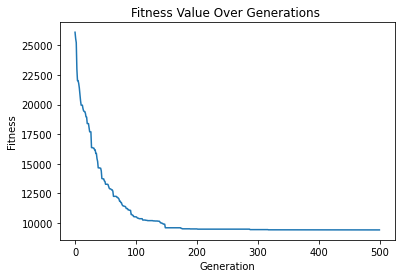

In [6]:
readDataSet("berlin52.txt")
ga = geneticAlgorithm(nbrGenerations = 500,popSize = 100 ,elitismSize = 20 ,poolSize = 10 ,mutationRate = 0.008 )